# Analyzing Seattle Airbnb Dataset for Price Prediction


## DataSet
[Inside Airbnb](http://insideairbnb.com/) is an independent, non-commercial set of tools and data that allows you to explore how Airbnb is really being used in cities around the world.

### Seattle, Washington, United States
See [Seattle data visually here](http://insideairbnb.com/seattle/).

| Date Compiled | Country/City | File Name | Description |
|---------------|--------------|-----------|-------------|
| 21 May, 2020 | Seattle | [listings.csv.gz](http://data.insideairbnb.com/united-states/wa/seattle/2020-05-21/data/listings.csv.gz) |Detailed Listings data for Seattle|
|21 May, 2020|Seattle|[calendar.csv.gz](http://data.insideairbnb.com/united-states/wa/seattle/2020-05-21/data/calendar.csv.gz)|Detailed Calendar Data for listings in Seattle|
|21 May, 2020|Seattle|[reviews.csv.gz](http://data.insideairbnb.com/united-states/wa/seattle/2020-05-21/data/reviews.csv.gz)|Detailed Review Data for listings in Seattle|
|21 May, 2020|Seattle|[listings.csv](http://data.insideairbnb.com/united-states/wa/seattle/2020-05-21/visualisations/listings.csv)|Summary information and metrics for listings in Seattle (good for visualisations|
|21 May, 2020|Seattle|[reviews.csv](http://data.insideairbnb.com/united-states/wa/seattle/2020-05-21/visualisations/reviews.csv)|Summary Review data and Listing ID (to facilitate time based analytics and visualisations linked to a listing).|
|N/A|Seattle|[neighbourhoods.csv](http://data.insideairbnb.com/united-states/wa/seattle/2020-05-21/visualisations/neighbourhoods.csv)|Neighbourhood list for geo filter. Sourced from city or open source GIS files.|
|N/A|Seattle|[neighbourhoods.geojson](http://data.insideairbnb.com/united-states/wa/seattle/2020-05-21/visualisations/neighbourhoods.geojson)|GeoJSON file of neighbourhoods of the city.|






In [1]:
!dir "./data/"

Volume in drive C is Local Disk
 Volume Serial Number is 8471-B1A1

 Directory of c:\Users\kirti\OneDrive\SpringBoard\SpringBoard_DataScience_Carrier\CapstoneProject\data

07/04/2020  01:59 AM    <DIR>          .
07/04/2020  01:59 AM    <DIR>          ..
07/04/2020  01:58 AM         8,035,398 calendar.csv.gz
07/04/2020  01:58 AM         8,180,987 listings.csv.gz
07/04/2020  01:58 AM        42,848,581 reviews.csv.gz
               3 File(s)     59,064,966 bytes
               2 Dir(s)   8,844,955,648 bytes free


In [68]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")



In [24]:
df_calendar=pd.read_csv('./data/calendar.csv.gz')
print(f"Shape of dataset is: {df_calendar.shape}")
print("\nColumns Of DataSet is :\n")
print(df_calendar.dtypes)
df_calendar.head()

Shape of dataset is: (2561205, 7)

Columns Of DataSet is :

listing_id         int64
date              object
available         object
price             object
adjusted_price    object
minimum_nights     int64
maximum_nights     int64
dtype: object


,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,2318,2020-05-21,f,$243.00,$243.00,1,1125
1,708774,2020-05-21,f,$105.00,$105.00,30,1125
2,708774,2020-05-22,f,$120.00,$120.00,30,1125
3,708774,2020-05-23,f,$120.00,$120.00,30,1125
4,708774,2020-05-24,f,$105.00,$105.00,30,1125


In [26]:
df_listings=pd.read_csv('./data/listings.csv.gz')
print(f"Shape of dataset is: {df_listings.shape}")
print("\nColumns Of DataSet is :\n")
print(df_listings.columns)
df_listings.head()

Shape of dataset is: (7017, 106)

Columns Of DataSet is :

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       ...
       'instant_bookable', 'is_business_travel_ready', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month'],
      dtype='object', length=106)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2318,https://www.airbnb.com/rooms/2318,20200521035945,2020-05-21,Casa Madrona - Urban Oasis 1 block from the park!,"Gorgeous, architect remodeled, Dutch Colonial ...","This beautiful, gracious home has been complet...","Gorgeous, architect remodeled, Dutch Colonial ...",none,Madrona is a hidden gem of a neighborhood. It ...,...,t,f,strict_14_with_grace_period,f,f,2,2,0,0,0.22
1,6606,https://www.airbnb.com/rooms/6606,20200521035945,2020-05-21,"Fab, private seattle urban cottage!","This tiny cottage is only 15x10, but it has ev...","Soo centrally located, this is a little house ...","This tiny cottage is only 15x10, but it has ev...",none,"A peaceful yet highly accessible neighborhood,...",...,f,f,strict_14_with_grace_period,f,f,3,3,0,0,1.14
2,9419,https://www.airbnb.com/rooms/9419,20200521035945,2020-05-21,Glorious sun room w/ memory foambed,This beautiful double room features a magical ...,Our new Sunny space has a private room from th...,This beautiful double room features a magical ...,none,"Lots of restaurants (see our guide book) bars,...",...,f,f,moderate,t,t,7,0,7,0,1.24
3,9531,https://www.airbnb.com/rooms/9531,20200521035945,2020-05-21,The Adorable Sweet Orange Craftsman,The Sweet Orange is a delightful and spacious ...,"The Sweet Orange invites you to stay and play,...",The Sweet Orange is a delightful and spacious ...,none,The neighborhood is awesome! Just far enough ...,...,f,f,strict_14_with_grace_period,f,t,2,2,0,0,0.39
4,9534,https://www.airbnb.com/rooms/9534,20200521035945,2020-05-21,The Coolest Tangerine Dream MIL!,Welcome to my delicious Tangerine Dream! A co...,"The Tangerine Dream is a delightful, cozy moth...",Welcome to my delicious Tangerine Dream! A co...,none,The neighborhood is the best of two worlds...w...,...,f,f,strict_14_with_grace_period,f,t,2,2,0,0,0.49


In [25]:
df_reviews=pd.read_csv('./data/reviews.csv.gz')
print(f"Shape of dataset is: {df_reviews.shape}")
print("\nColumns Of DataSet is :\n")
print(df_reviews.dtypes)
df_reviews.head()

Shape of dataset is: (387809, 6)

Columns Of DataSet is :

listing_id        int64
id                int64
date             object
reviewer_id       int64
reviewer_name    object
comments         object
dtype: object


,listing_id,id,date,reviewer_id,reviewer_name,comments
0,2318,146,2008-09-15,2451,Kevin,1000 times better than staying at a hotel.
1,2318,126302712,2017-01-10,12332845,Jessica,"Our family (two couples, a two year old and an..."
2,2318,140977084,2017-04-01,4789466,Ivan,Top of the list locations we have stayed at! T...
3,2318,147262504,2017-04-25,55817131,Mike,"SUCH an awesome place. Very clean, quiet and s..."
4,2318,161806368,2017-06-18,113604590,Pete,We flew quite a distance to be at our only dau...


# Data Cleaning

- Checking empty values in dataset
- Remove $ from multiple price realted coloumns



## Checking empty values in dataset

In [6]:
print(df_reviews.describe())
df_calendar.describe()

listing_id            id   reviewer_id
count  3.878090e+05  3.878090e+05  3.878090e+05
mean   1.432287e+07  3.091110e+08  8.304847e+07
std    9.981904e+06  1.796892e+08  7.803200e+07
min    2.318000e+03  1.460000e+02  1.500000e+01
25%    5.978216e+06  1.578647e+08  2.008264e+07
50%    1.353312e+07  2.973863e+08  5.725978e+07
75%    2.124484e+07  4.740647e+08  1.286304e+08
max    4.330424e+07  6.254448e+08  3.464126e+08


,listing_id,minimum_nights,maximum_nights
count,2.561205e+06,2.561205e+06,2.561205e+06
mean,2.274041e+07,1.565959e+01,8.373513e+02
std,1.243107e+07,4.778282e+01,4.797768e+02
min,2.318000e+03,1.000000e+00,1.000000e+00
25%,1.300363e+07,2.000000e+00,3.650000e+02
50%,2.221062e+07,3.000000e+00,1.125000e+03
75%,3.394143e+07,3.000000e+01,1.125000e+03
max,4.348836e+07,1.000000e+03,1.000000e+04


In [7]:
null_columns=df_calendar.columns[df_calendar.isnull().any()]
df_calendar[null_columns].isnull().sum()

Series([], dtype: float64)

In [14]:
null_columns=df_listings.columns[df_listings.isnull().any()]
df_listings[null_columns].isnull().sum()

summary                         145
space                          1173
description                      37
neighborhood_overview          1863
notes                          2715
transit                        1971
access                         2293
interaction                    1769
house_rules                    1568
thumbnail_url                  7017
medium_url                     7017
xl_picture_url                 7017
host_location                     8
host_about                     1747
host_response_time             1757
host_response_rate             1757
host_acceptance_rate            965
host_neighbourhood              598
state                             1
zipcode                          32
market                           18
bathrooms                         1
bedrooms                          6
beds                             68
square_feet                    6771
weekly_price                   6207
monthly_price                  6373
security_deposit            

In [15]:
null_columns=df_reviews.columns[df_reviews.isnull().any()]
df_reviews[null_columns].isnull().sum()

comments    173
dtype: int64

### Remove $ from multiple price realted coloumns:
price,weekely price,monthly price,extra_people


In [27]:
list_of_price_columns=['price','weekly_price','monthly_price','security_deposit','cleaning_fee']
for col in list_of_price_columns:
    df_listings[col]=df_listings[col].str.replace('$','')

df_listings[list_of_price_columns].head()

,price,weekly_price,monthly_price,security_deposit,cleaning_fee
0,296.00,NaN,NaN,500.00,250.00
1,90.00,670.00,NaN,200.00,40.00
2,62.00,580.00,"1,500.00",100.00,20.00
3,165.00,"1,075.00","3,000.00",300.00,120.00
4,125.00,825.00,"2,500.00",400.00,95.00


In [28]:
df_test =df_calendar[df_calendar['available']==1].groupby('listing_id')['date'].apply(list).reset_index(name='dates')
df_test['count']= df_test['dates'].apply(len)

In [20]:
df_test

,listing_id,dates,count
0,2318,"[2020-05-22, 2020-05-23, 2020-05-24, 2020-05-2...",132
1,6606,"[2020-05-22, 2020-05-23, 2020-05-24, 2020-05-2...",89
2,9419,"[2020-05-22, 2020-05-23, 2020-05-24, 2020-05-2...",364
3,9531,"[2020-08-01, 2020-08-02, 2020-08-03, 2020-08-0...",293
4,9534,"[2020-05-21, 2020-05-22, 2020-05-23, 2020-06-3...",323
...,...,...,...
5246,43458946,"[2020-06-17, 2020-06-18, 2020-06-19, 2020-06-2...",338
5247,43461448,"[2020-05-24, 2020-05-25, 2020-05-26, 2020-05-2...",316
5248,43479012,"[2020-05-21, 2020-05-22, 2020-05-23, 2020-05-2...",90
5249,43487585,"[2020-05-21, 2020-05-22, 2020-05-23, 2020-05-2...",90


# Data Wrangling
- Replace values t and f with 0 and 1 in columns
- Calculate Availability per listing id
- Merging with original dataset(listings)


## Replace values t and f with 0 and 1 in columns

In [29]:
df_calendar['available'] = df_calendar['available'].apply(lambda x:1 if x=='t' else 0)
df_listings['host_is_superhost']=df_listings['host_is_superhost'].apply(lambda x:1 if x=='t' else 0)

## Calculate availability of each listings

In [30]:
# Calculate availability of each listings
df_calendar_availability = df_calendar.groupby('listing_id')['available'].sum().reset_index()
df_calendar_availability

,listing_id,available
0,2318,132
1,6606,89
2,9419,364
3,9531,293
4,9534,323
...,...,...
7012,43458946,338
7013,43461448,316
7014,43479012,90
7015,43487585,90


## Merge availability with original listing dataframe

In [31]:

merged_df = pd.merge(df_calendar_availability, df_listings, left_on='listing_id',right_on='id')
merged_df.head()

,listing_id,available,id,listing_url,scrape_id,last_scraped,name,summary,space,description,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2318,132,2318,https://www.airbnb.com/rooms/2318,20200521035945,2020-05-21,Casa Madrona - Urban Oasis 1 block from the park!,"Gorgeous, architect remodeled, Dutch Colonial ...","This beautiful, gracious home has been complet...","Gorgeous, architect remodeled, Dutch Colonial ...",...,t,f,strict_14_with_grace_period,f,f,2,2,0,0,0.22
1,6606,89,6606,https://www.airbnb.com/rooms/6606,20200521035945,2020-05-21,"Fab, private seattle urban cottage!","This tiny cottage is only 15x10, but it has ev...","Soo centrally located, this is a little house ...","This tiny cottage is only 15x10, but it has ev...",...,f,f,strict_14_with_grace_period,f,f,3,3,0,0,1.14
2,9419,364,9419,https://www.airbnb.com/rooms/9419,20200521035945,2020-05-21,Glorious sun room w/ memory foambed,This beautiful double room features a magical ...,Our new Sunny space has a private room from th...,This beautiful double room features a magical ...,...,f,f,moderate,t,t,7,0,7,0,1.24
3,9531,293,9531,https://www.airbnb.com/rooms/9531,20200521035945,2020-05-21,The Adorable Sweet Orange Craftsman,The Sweet Orange is a delightful and spacious ...,"The Sweet Orange invites you to stay and play,...",The Sweet Orange is a delightful and spacious ...,...,f,f,strict_14_with_grace_period,f,t,2,2,0,0,0.39
4,9534,323,9534,https://www.airbnb.com/rooms/9534,20200521035945,2020-05-21,The Coolest Tangerine Dream MIL!,Welcome to my delicious Tangerine Dream! A co...,"The Tangerine Dream is a delightful, cozy moth...",Welcome to my delicious Tangerine Dream! A co...,...,f,f,strict_14_with_grace_period,f,t,2,2,0,0,0.49


# Data Visualization(StoryTelling)
- How many are superhost and host ?
- How many properties per neighborhood?
- Distribution of Prices among property types and neighborhood?
- Price Trend in a month

## How many are superhost and host ?
A: Superhosts are experienced hosts who provide a shining example for other hosts, and extraordinary experiences for their guests.
Once a host reaches Superhost status, a badge superhost badge will automatically appear on their listing and profile to help you identify them.
From our data set we calculated superhost vs normal host and found 3027 superhost and 3990 host.


In [45]:
merged_df['host_is_superhost'].value_counts()

0    3990
1    3027
Name: host_is_superhost, dtype: int64

## How many properties per neighborhood?
A: Our dataset is categorized into various neighborhoods .
We plotted a bar graph and found majority of listings belong to other neighborhood, downtown and capital hill.


In [75]:
df_neighbourhood=merged_df.groupby('neighbourhood_group_cleansed')['id'].count()
df_neighbourhood=df_neighbourhood.to_frame(name='count').sort_values(by='count',ascending=False).reset_index()
df_neighbourhood

,neighbourhood_group_cleansed,count
0,Other neighborhoods,1334
1,Downtown,1177
2,Capitol Hill,713
3,Central Area,596
4,Queen Anne,487
5,West Seattle,396
6,Rainier Valley,386
7,Ballard,382
8,Cascade,294
9,Beacon Hill,263


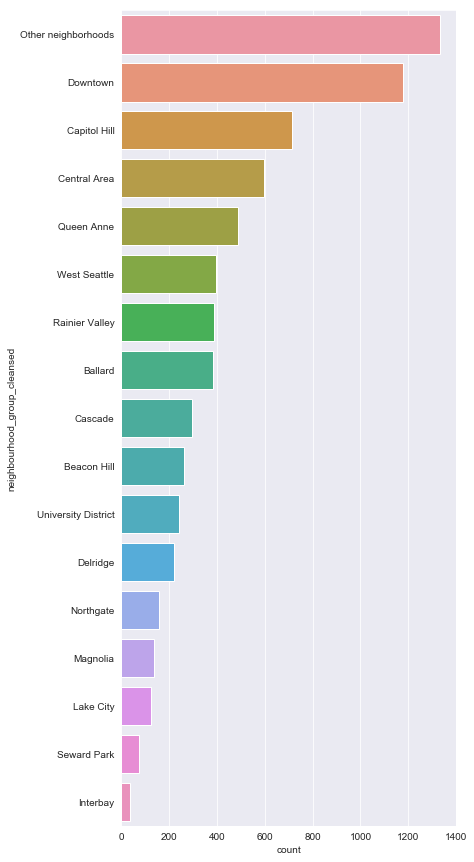

In [76]:
#Initialize the matplltlib figure
f,ax=plt.subplots(figsize=(6,15))
ax=sns.barplot(x="count",y="neighbourhood_group_cleansed",data=df_neighbourhood)



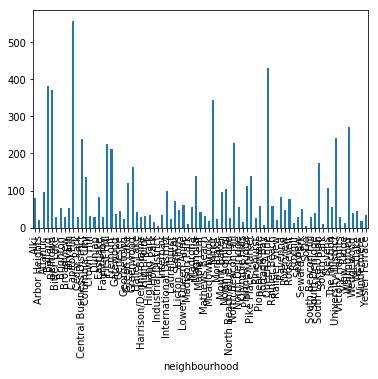

In [23]:
df_listings.groupby('neighbourhood')['id'].count().plot(kind='bar')

In [18]:
df_listings.groupby('neighbourhood')['id'].count()

neighbourhood
Alki               79
Arbor Heights      20
Atlantic           95
Ballard           382
Belltown          371
                 ... 
Wallingford       272
Wedgewood          40
Westlake           45
Windermere         19
Yesler Terrace     35
Name: id, Length: 79, dtype: int64

In [19]:
df_calendar['available'].value_counts()

0    1565678
1     995527
Name: available, dtype: int64